In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
data = pd.read_excel("C:\\Users\\91755\\Desktop\\Excelr Assignments\\Random Forest\\Random Forest\\glass.xlsx", sheet_name="glass")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [17]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
# Define target column (ensure the column name is correct in your dataset)
target_column = "Type"  

# Check if the target column exists
if target_column in data.columns:
    # Separate features and target
    X = data.drop(target_column, axis=1)  # Features
    y = data[target_column]  # Target
    print("\nFeatures and target separated successfully.")
else:
    print(f"Column '{target_column}' not found in the dataset.")
    exit()


Features and target separated successfully.


In [21]:
# Select only numeric columns for features
numeric_columns = X.select_dtypes(include=["float64", "int64"]).columns
print("\nNumeric Columns:", numeric_columns)


Numeric Columns: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')


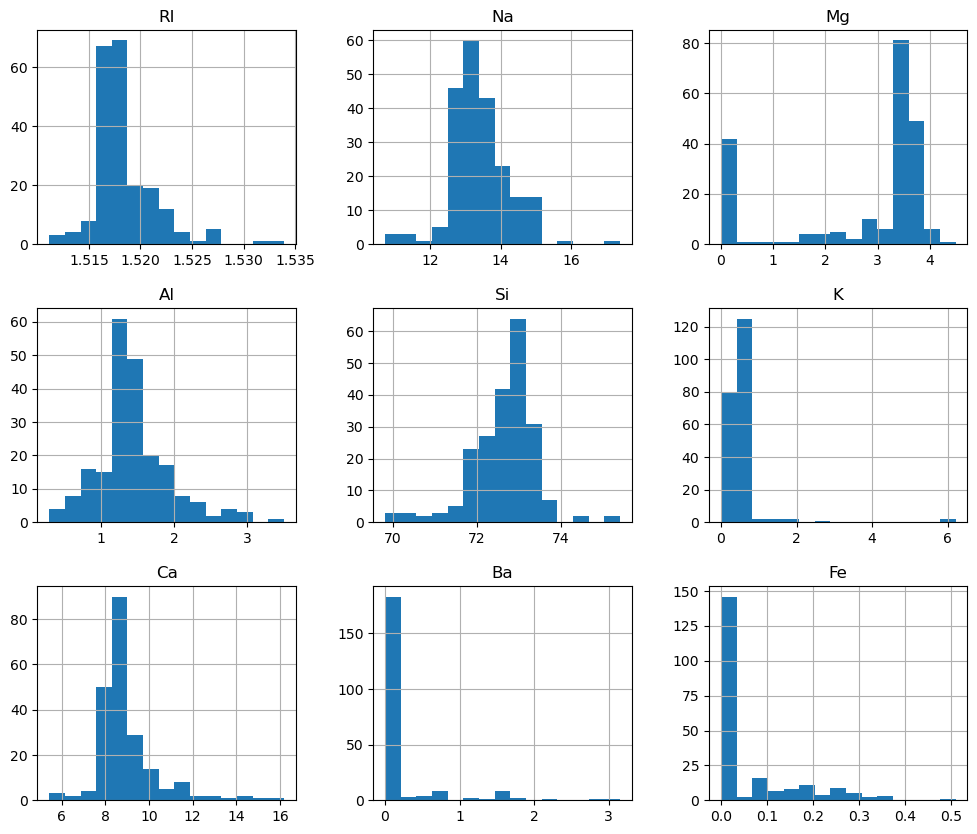

In [23]:
# Plot histograms for numeric columns
if len(numeric_columns) > 0:
    X[numeric_columns].hist(figsize=(12, 10), bins=15)
    plt.show()
else:
    print("No numeric columns available for plotting histograms.")

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (171, 9)
y_train shape: (171,)


In [27]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [ ]:
1. Explain Bagging and Boosting methods. How is it different from each other.
-->Bagging (Bootstrap Aggregating):
Creates multiple subsets of data (with replacement).
Trains individual models (e.g., decision trees) in parallel.
Combines predictions using averaging (regression) or voting (classification).
Goal: Reduces variance, prevents overfitting.
-->Boosting:
Trains models sequentially, where each model focuses on correcting errors of the previous one.
Weights are adjusted to emphasize misclassified instances.
Combines models to improve overall accuracy.
Goal: Reduces bias and variance, achieves better performance.

Key Differences:
Bagging reduces variance, while Boosting reduces bias.
Bagging trains models independently; Boosting trains them sequentially.
Boosting is more prone to overfitting if not tuned carefully.

2. Explain how to handle imbalance in the data.
-->Resampling Techniques:
Oversampling: Duplicate minority class samples (e.g., SMOTE).
Undersampling: Reduce majority class samples.
Using Class Weights:
Assign higher weights to the minority class in algorithms.
Synthetic Data Generation:
Create artificial data points for the minority class (e.g., SMOTE, ADASYN).
Choose Appropriate Metrics:
Focus on Precision, Recall, F1-Score, or AUC-ROC instead of accuracy.
Ensemble Methods:
Use balanced ensembles like Random Forest or Boosting with class weighting.
